# Misc dataset

In [1]:
from model.graph_mcmc import Graph_MCMC

In [2]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [3]:
graph = Graph_MCMC()
graph.read_from_ns("sp_primary_school/day_2") # escorts could be fun

In [4]:
graph.remove_property("viz")
graph.remove_property("label")

True

In [5]:
graph.G.vertex_properties

{'_graphml_vertex_id': <VertexPropertyMap object with value type 'int16_t', for Graph 0x7fac595722e0, at 0x7facc834ed90>, 'classname': <VertexPropertyMap object with value type 'string', for Graph 0x7fac595722e0, at 0x7fac59572c40>, 'gender': <VertexPropertyMap object with value type 'string', for Graph 0x7fac595722e0, at 0x7fac59572d00>, '_pos': <VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fac595722e0, at 0x7fac59572e50>}

In [6]:
graph.convert_props_to_flags()
graph.remove_property("Unknown")

False

In [7]:
graph.print_info()

Graph with N=238 nodes, E=5539 edges and D=14 vertex features for training


In [8]:
graph.list_props()

name                   (graph)   (type: string, val: sp_primary_school (day_2))
description            (graph)   (type: string, val: Two temporal networks of
                                                     contacts among students
                                                     and teachers at a primary
                                                     school in Lyon, France, on
                                                     consecutive days of in
                                                     October 2009. Each network
                                                     accumulates all contacts
                                                     over the course of a
                                                     single day; contacts were
                                                     sampled at 20-second
                                                     intervals)
citation               (graph)   (type: string, val: ['Juliette Stehle et al.,
  

In [9]:
graph.partition(B_min=1, B_max=30)

Performing inference...
    B: 17 <- 30    shrinking 30 -> 23
    B: 17 <- 30    B=23  niter:     1  count:    0  breaks:  0  min_S: 10276.428  max_S: 10282.502  S: 10276.428  ΔS:     -6.07377  moves:     5 
    B: 17 <- 30    B=23  niter:     2  count:    1  breaks:  1  min_S: 10276.428  max_S: 10282.502  S: 10276.081  ΔS:    -0.346540  moves:     2 
    B: 17 <- 30    shrinking 23 -> 18
    B: 17 <- 30    B=18  niter:     1  count:    0  breaks:  0  min_S: 10242.892  max_S: 10251.459  S: 10242.892  ΔS:     -8.56719  moves:     3 
    B: 17 <- 30    B=18  niter:     2  count:    1  breaks:  1  min_S: 10242.892  max_S: 10251.459  S: 10242.892  ΔS:      0.00000  moves:     0 
    B: 17 <- 30    shrinking 18 -> 17
    B: 17 <- 30    B=17  niter:     1  count:    1  breaks:  1  min_S: 10289.911  max_S: 10289.911  S: 10289.911  ΔS:      0.00000  moves:     0 
Current bracket: (1, 17, 30) (14018.523293231226, 10289.91073975834, 10380.563748555696)
    B: 9 <- 17    shrinking 17 -> 13
    B:

<VertexPropertyMap object with value type 'int32_t', for Graph 0x7fac595722e0, at 0x7fac5953cdf0>

In [10]:
graph.mcmc(num_iter=10000)

100%|██████████| 10000/10000 [00:11<00:00, 881.05it/s]


18

Drawing soft partition


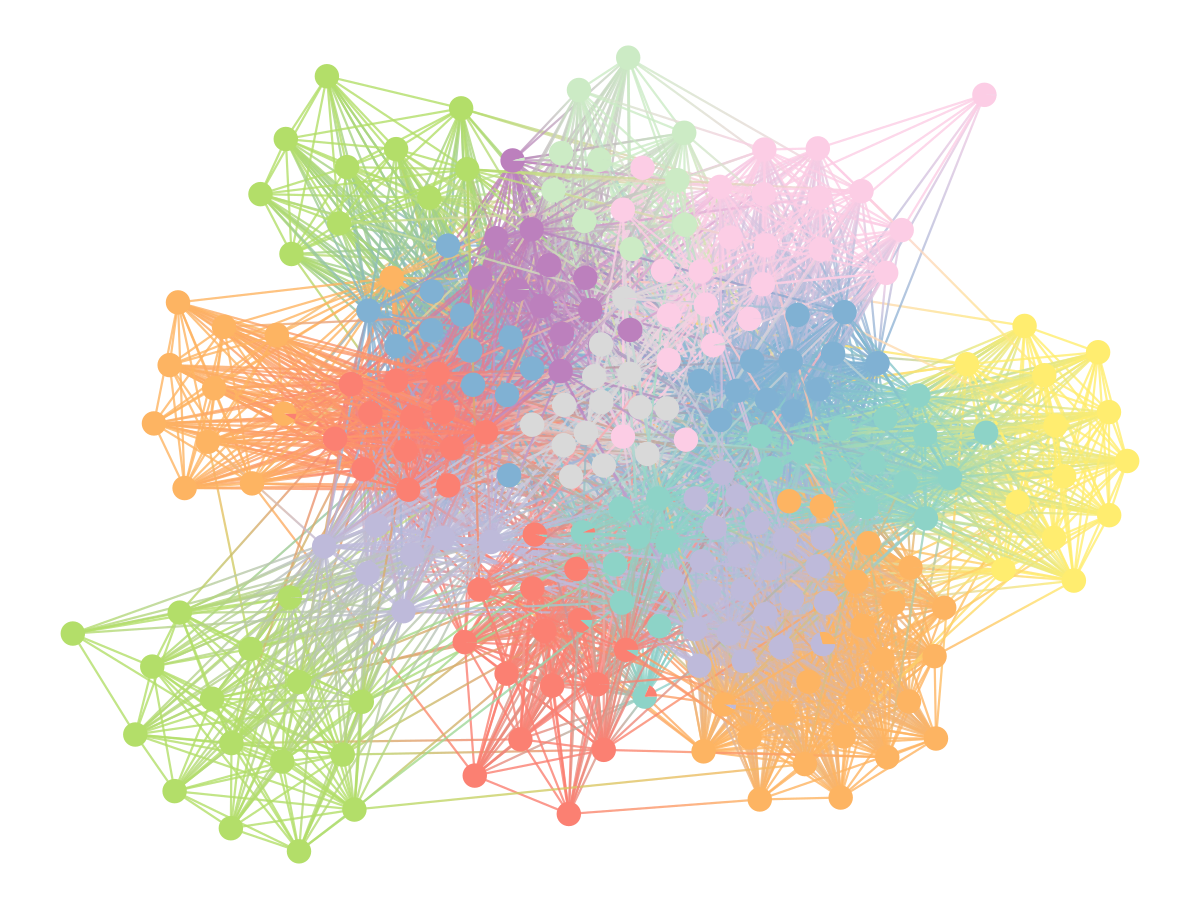

In [11]:
#graph.draw(gen_layout=False, output="school-graph.png")
graph.draw(gen_layout=False)

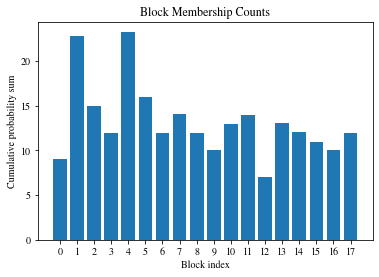

In [12]:
graph.plot_posterior_props()

## Train classifier

In [13]:
classifier = graph.sample_classifier_mala(10000, step_scaling=0.1, verbose=True)

100%|██████████| 10000/10000 [00:10<00:00, 970.47it/s]Sample accept ratio: 81.64%
Train. set accuracy: 60.50420168067227%



## Interpret results

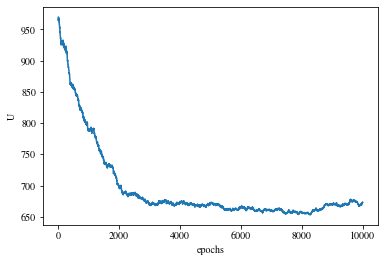

In [14]:
classifier.plot_U()

In [15]:
classifier.thin_samples(burn_in_pc=30, thinning_pc=10)

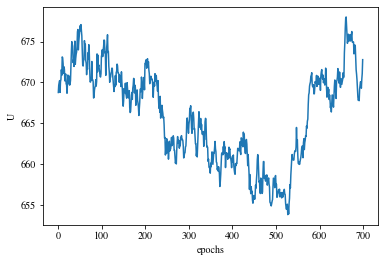

In [16]:
classifier.plot_U()

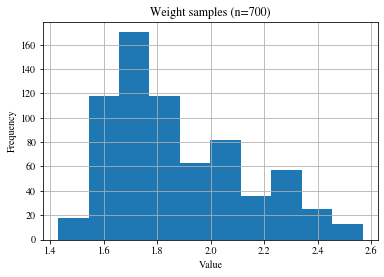

In [17]:
classifier.plot_sample_histogram()

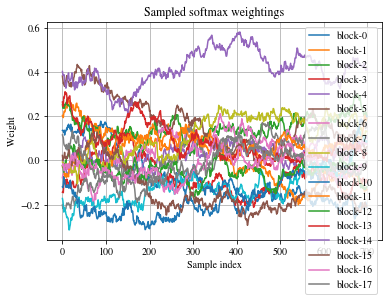

In [18]:
classifier.plot_sample_history()

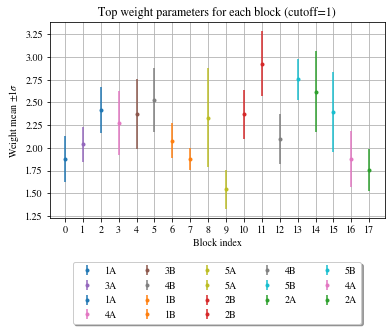

In [19]:
names = list(graph.get_feature_names())
classifier.plot_block_principal_dims(names, cutoff=1, legend=True)

Discarding feature 10: Teachers
Discarding feature 11: F
Discarding feature 12: M
Discarding feature 14: bias


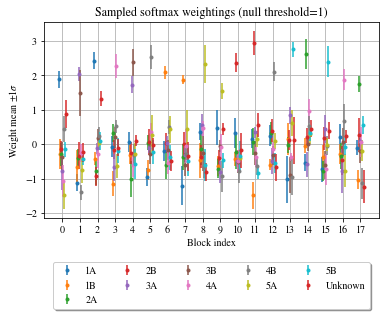

In [20]:
names = list(graph.get_feature_names())
classifier.plot_sampled_weights(names, std_dev_multiplier=1, null_space=1, legend=True)